# **선형 판별분석과 이차 판별분석**(분류 모델)

판별분석 Discriminant Analysis
- 로지스틱 회귀분석처럼 질적 척도로 이루어진 종속변수를 분류할 때 쓰이는 분석 기법.
- 기계학습보다는 통계 기반의 데이터 분류 모델에 더 가깝다.

**일반 판별분석 / 두 집단 판별분석 Two-group Discriminant Analysis**
- 종속 변수의 범주가 두 개일 경우
**다중 판별분석 Multiple Discriminant Analysis**
- 범주가 세 개 이상일 경우

범주를 구분하는 결정경계선을 산출하는 방식에 따라 **선형판별분석(LDA: Linear Discriminant Analysis)**과 **이차판별분석(QDA: Quadratic Discriminant Analysis)**로 구분된다.

**선형 판별분석 LDA**

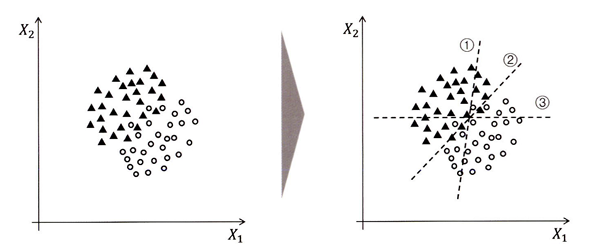

**이차 판별분석 QDA**

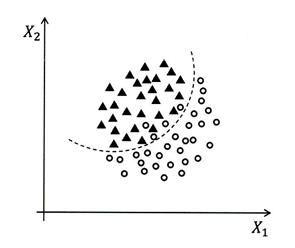

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
# 성별 분포 시각화 (키 X 몸무게)
df_man = df.loc[df['gender'] == 'M']
df_woman = df.loc[df['gender'] == 'F']

print(df_man.head())
print(df_woman.head())

    age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B  
     age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
5   36.0      F      165.

<ipython-input-7-5e7a197713d7>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=df_man.height_cm, y=df_man.weight_kg, cmap='Blues',
<ipython-input-7-5e7a197713d7>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x=df_woman.height_cm, y=df_woman.weight_kg, cmap='Reds',


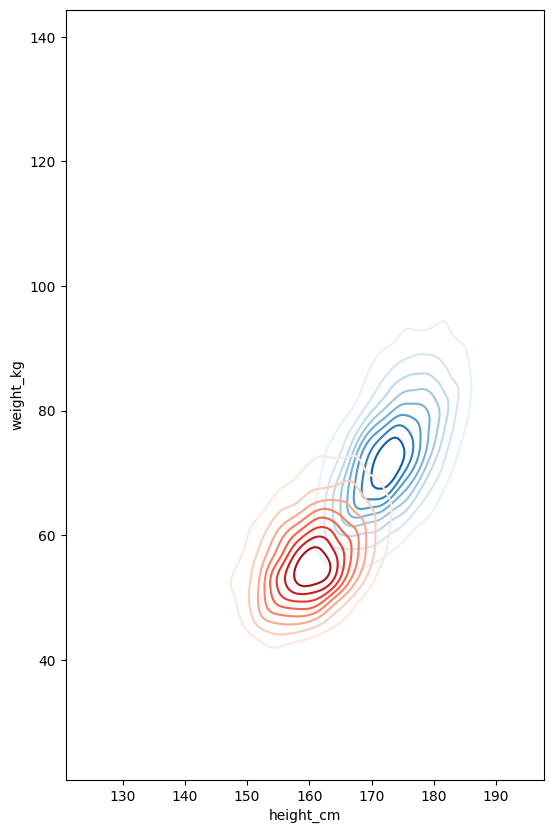

In [7]:
# 그래프 설정
f, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')

# 가로길이, 세로길이 변수 축 설정
ax = sns.kdeplot(x=df_man.height_cm, y=df_man.weight_kg, cmap='Blues',
                 shade=False, thresh=False, cbar=False)
ax = sns.kdeplot(x=df_woman.height_cm, y=df_woman.weight_kg, cmap='Reds',
                 shade=False, thresh=False, cbar=False)

red = sns.color_palette('Reds')[-2]
blue = sns.color_palette('Blues')[-2]

In [10]:
# 독립변수 정규화

# 독립변수와 종속변수로 분리
df_x = df.drop(['gender', 'age', 'class'], axis=1)
df_y = df[['gender']]

# 데이터 정규화 적용
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df_x)

df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()

,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172
1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776
2,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360
3,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772
4,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172


In [11]:
# train dataset과 test dataset을 분리하여 생성 (7:3)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=10)

print(len(x_train))
print(len(x_test))

9375
4018


In [12]:
# 선형 판별 분석 모델 적용
LDA1 = LinearDiscriminantAnalysis(store_covariance=True)
LDA1.fit(x_train, y_train)
y_train_pred = LDA1.predict(x_train)
y_test_pred = LDA1.predict(x_test)

# train dataset accuracy
print(accuracy_score(y_train, y_train_pred))
# test dataset accuracy
print(accuracy_score(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9784533333333333
0.9810851169736187


In [13]:
# 선형 판별 분석 모델 상수와 계숫값 출력
print('intercept: ', LDA1.intercept_)
print('coefficient: ', LDA1.coef_)

intercept:  [-14.29894437]
coefficient:  [[ -1.35700815  26.12716198 -29.708912     4.0661269   10.03194981
   18.0750803  -57.34544185  -3.81399695  15.48677609]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-14-ff011f6d89d2>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'],
<ipython-input-14-ff011f6d89d2>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functi

<Axes: xlabel='lda_component'>

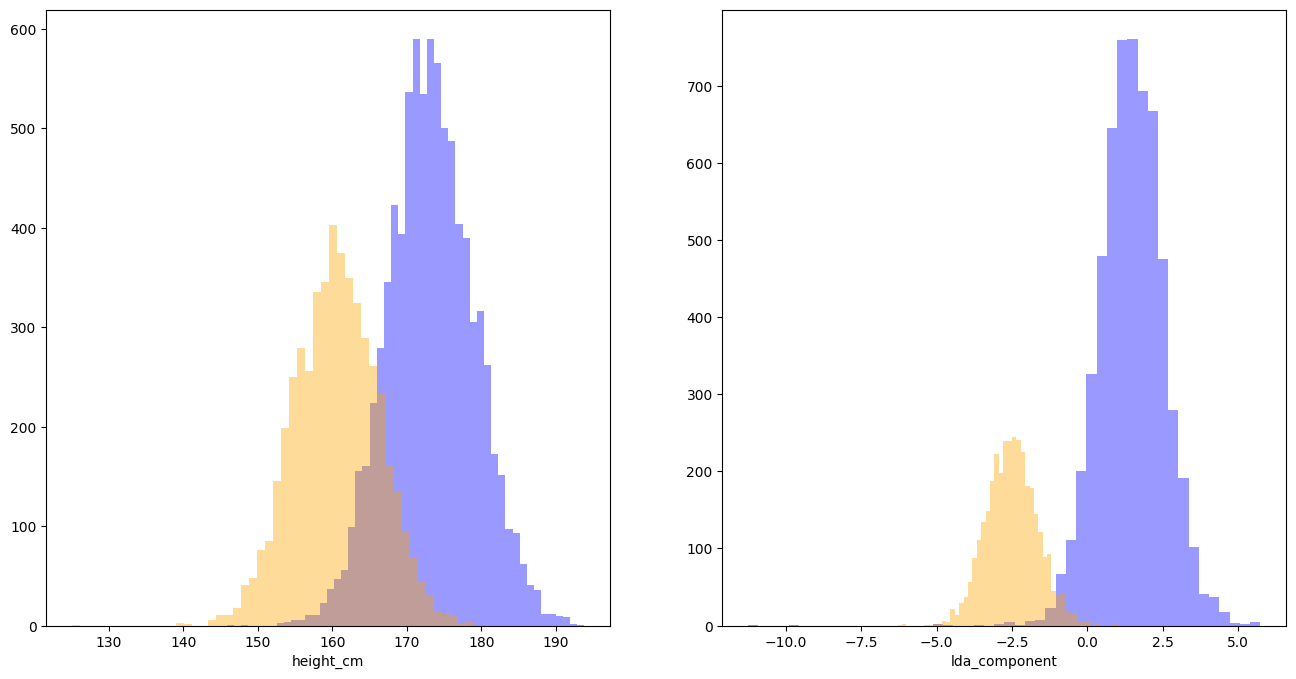

In [14]:
# 선형 판별분석 차원축소 적용

# 주성분 1개로 설정
lda_com = LinearDiscriminantAnalysis(n_components=1)
lda_com.fit(x_train, y_train)
df_lda_com = lda_com.transform(x_train)
df_lda_component = pd.DataFrame(df_lda_com, columns=['lda_component'])

# 종속변수 데이터셋 인덱스 초기화 및 결합
y_train_index = y_train.reset_index()
df_lda_component['target'] = y_train_index['gender']

# 차원축소 요소 분별력 비교 시각화 설정
fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=1)

# 키 요소의 분별력
sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'],
             hist=True, kde=False, color='blue', label='man', ax=axs[0])
sns.distplot(df.loc[df['gender'] == 'F', 'height_cm'],
             hist=True, kde=False, color='orange', label='woman', ax=axs[0])

# 차원축소 주성분의 분별력
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'M', 'lda_component'],
             hist=True, kde=False, color='blue', label='man', ax=axs[1])
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'F', 'lda_component'],
             hist=True, kde=False, color='orange', label='woman', ax=axs[1])

In [16]:
# 이차 판별분석 모델 적용
qda = QuadraticDiscriminantAnalysis(store_covariance=True)

qda.fit(x_train, y_train)
qda_y_train_pred = qda.predict(x_train)
qda_y_test_pred = qda.predict(x_test)

print(accuracy_score(y_train, qda_y_train_pred))
print(accuracy_score(y_test, qda_y_test_pred))

0.98048
0.9798407167745147


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# 이차 판별분석 모델 성능 리포트 출력
print(classification_report(y_test, qda_y_test_pred))

              precision    recall  f1-score   support

           F       0.97      0.97      0.97      1463
           M       0.98      0.98      0.98      2555

    accuracy                           0.98      4018
   macro avg       0.98      0.98      0.98      4018
weighted avg       0.98      0.98      0.98      4018



# **서포트벡터머신 SVM**(분류 모델)

In [18]:
import sklearn.svm as svm
from sklearn.svm import SVC

In [19]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [20]:
# 독립변수 정규화
df_x = df.drop(['Area', 'Class'], axis=1)
df_y = df[['Class']]

# 데이터 정규화
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df_x)

df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493


In [22]:
# 학습셋과 테스트셋 분리하여 생성(6:4)

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.4, random_state=10)

print(len(x_train))
print(len(x_test))

540
360


In [25]:
# 선형 SVM 모델 성능 확인

# 3차항, 학습 반복 횟수 10000 설정
svm_model = SVC(kernel='linear', degree=3, gamma='auto', C=10, max_iter=10000)

svm_model.fit(x_train, y_train)

print(svm_model.score(x_train, y_train))
print(svm_model.score(x_test, y_test))

0.8648148148148148
0.8638888888888889


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
# SVM C값 1~30에 따른 모델 성능 확인

scores=[]
for c in [*range(1, 31)]:
  svc = SVC(kernel='rbf', C=c, max_iter=10000)
  C_model = svc.fit(x_train, y_train)
  train_score = C_model.score(x_train, y_train)
  test_score = C_model.score(x_test, y_test)
  print("rbf SVM : C: {}, train set score:{:2f}, test set score:{:2f}".format(c, train_score, test_score))
  scores.append([train_score, test_score])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C: 1, train set score:0.857407, test set score:0.883333
rbf SVM : C: 2, train set score:0.864815, test set score:0.880556
rbf SVM : C: 3, train set score:0.862963, test set score:0.886111


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C: 4, train set score:0.861111, test set score:0.880556
rbf SVM : C: 5, train set score:0.861111, test set score:0.880556
rbf SVM : C: 6, train set score:0.862963, test set score:0.883333
rbf SVM : C: 7, train set score:0.866667, test set score:0.883333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

rbf SVM : C: 8, train set score:0.864815, test set score:0.883333
rbf SVM : C: 9, train set score:0.864815, test set score:0.883333
rbf SVM : C: 10, train set score:0.864815, test set score:0.891667
rbf SVM : C: 11, train set score:0.864815, test set score:0.891667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C: 12, train set score:0.862963, test set score:0.891667
rbf SVM : C: 13, train set score:0.864815, test set score:0.891667
rbf SVM : C: 14, train set score:0.864815, test set score:0.891667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

rbf SVM : C: 15, train set score:0.864815, test set score:0.897222
rbf SVM : C: 16, train set score:0.864815, test set score:0.891667
rbf SVM : C: 17, train set score:0.864815, test set score:0.891667
rbf SVM : C: 18, train set score:0.864815, test set score:0.891667


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

rbf SVM : C: 19, train set score:0.864815, test set score:0.891667
rbf SVM : C: 20, train set score:0.864815, test set score:0.891667
rbf SVM : C: 21, train set score:0.864815, test set score:0.888889
rbf SVM : C: 22, train set score:0.864815, test set score:0.883333


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C: 23, train set score:0.864815, test set score:0.883333
rbf SVM : C: 24, train set score:0.862963, test set score:0.886111
rbf SVM : C: 25, train set score:0.861111, test set score:0.886111


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C: 26, train set score:0.861111, test set score:0.886111
rbf SVM : C: 27, train set score:0.861111, test set score:0.886111
rbf SVM : C: 28, train set score:0.861111, test set score:0.886111
rbf SVM : C: 29, train set score:0.861111, test set score:0.886111
rbf SVM : C: 30, train set score:0.861111, test set score:0.886111


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


`gamma` 매개변수값을 0.1\~20으로 바꿔가며 성능을 확인한다.
`gamma` 값은 이 데이터셋에서는 정확도에 큰 변화가 없지만 5~10정도에서 높은 정확도를 보이는 것을 알 수 있다.

# **시계열 분석** (예측모델)

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

!pip install pmdarima
import pmdarima as pm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.3 MB/s eta 0:00:00


In [35]:
df = pd.read_csv('walmart_cleaned.csv')
df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [36]:
# 주별 매출 집계 테이블 생성

# date 칼럼 날짜 형식 변환
df['Date2'] = pd.to_datetime(df['Date'])
# 날짜 오름차순 정렬
df = df.sort_values(by='Date2')
# 연도 칼럼 생성
df['Year'] = df['Date2'].dt.year

# 집계 칼럼 함수 설정
def func(df):
  df_sum = {}
  df_sum['Weekly_Sales'] = df['Weekly_Sales'].sum()
  df_sum['Temperature'] = df['Temperature'].mean()
  df_sum['Fuel_Price'] = df['Fuel_Price'].mean()
  df_sum['IsHoliday'] = df['IsHoliday'].max()
  df_sum['CPI'] = df['CPI'].mean()
  df_sum['Unemployment'] = df['Unemployment'].mean()
  return pd.Series(df_sum, index=['Weekly_Sales', 'Temperature', 'Fuel_Price', 'IsHoliday', 'CPI', 'Unemployment'])


# 집계 테이블 생성
df_agg = df.groupby(['Year', 'Date2']).apply(func).reset_index()

df_agg.head()

<ipython-input-36-0f9b937abc57>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_agg = df.groupby(['Year', 'Date2']).apply(func).reset_index()


,Year,Date2,Weekly_Sales,Temperature,Fuel_Price,IsHoliday,CPI,Unemployment
0,2010,2010-02-05,26842324.87,33.783804,2.694795,0.0,174.123337,8.234718
1,2010,2010-02-12,25812206.72,33.451490,2.672217,1.0,174.113619,8.219811
2,2010,2010-02-19,25707151.62,37.246745,2.650185,0.0,174.144192,8.233243
3,2010,2010-02-26,23530977.13,38.488821,2.667389,0.0,174.301025,8.227063
4,2010,2010-03-05,24998365.51,42.700910,2.715568,0.0,174.510657,8.236331


시계열 분석을 위해 지점별 매출액을 통합하여 일자별 월마트 전체 매출로 집계한다.

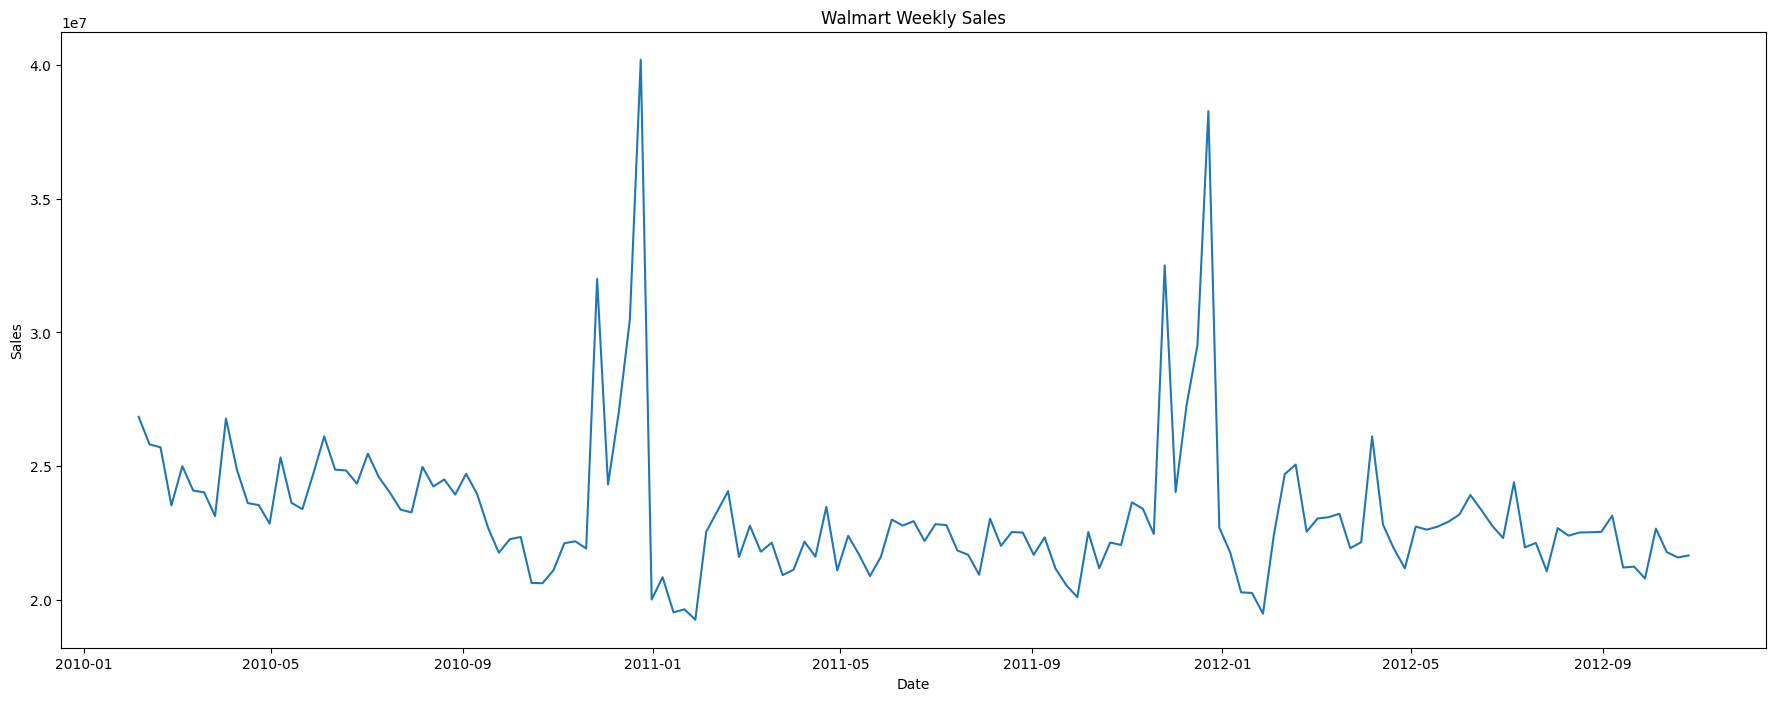

In [37]:
# 전체 매출 추세 확인
plt.figure(figsize=(22, 8))
plt.plot(df_agg.Date2, df_agg.Weekly_Sales)
plt.title('Walmart Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [38]:
# 시계열 분해용 데이터셋 생성
timeSeries_decomp = df_agg.loc[:, ['Date2', 'Weekly_Sales']]
timeSeries_decomp.index = timeSeries_decomp.Date2
ts_decomp = timeSeries_decomp.drop('Date2', axis=1)

ts_decomp.head()

,Weekly_Sales
Date2,
2010-02-05,26842324.87
2010-02-12,25812206.72
2010-02-19,25707151.62
2010-02-26,23530977.13
2010-03-05,24998365.51


<Figure size 640x480 with 0 Axes>

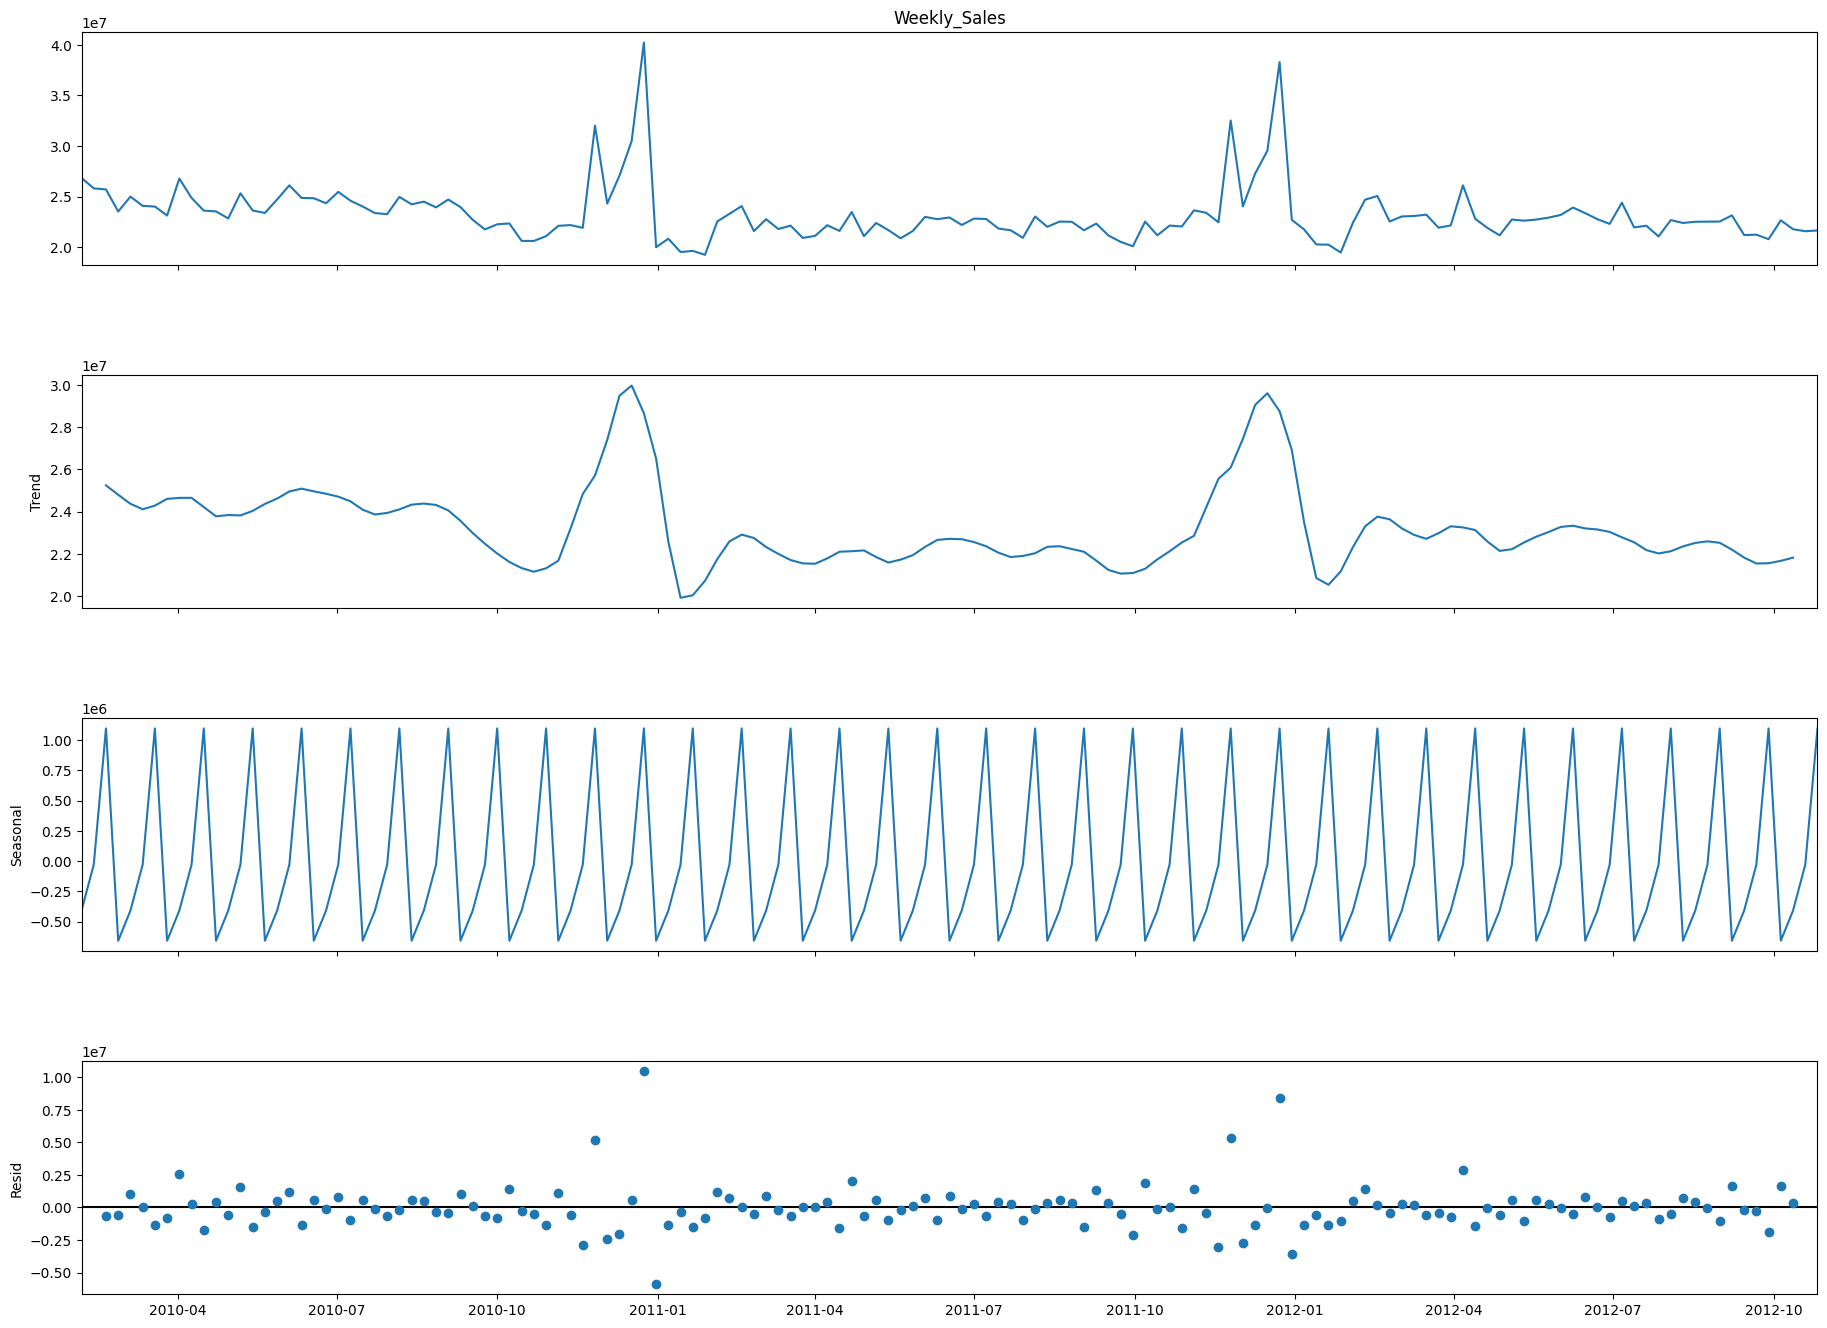

In [39]:
# 시계열 분해 시각화

# period= 월별은 12, 주별은 4, 일별은 7
decomp = seasonal_decompose(ts_decomp['Weekly_Sales'], model='additive', period=4)

fig = plt.figure()
fig = decomp.plot()
fig.set_size_inches(20, 15)
plt.show()

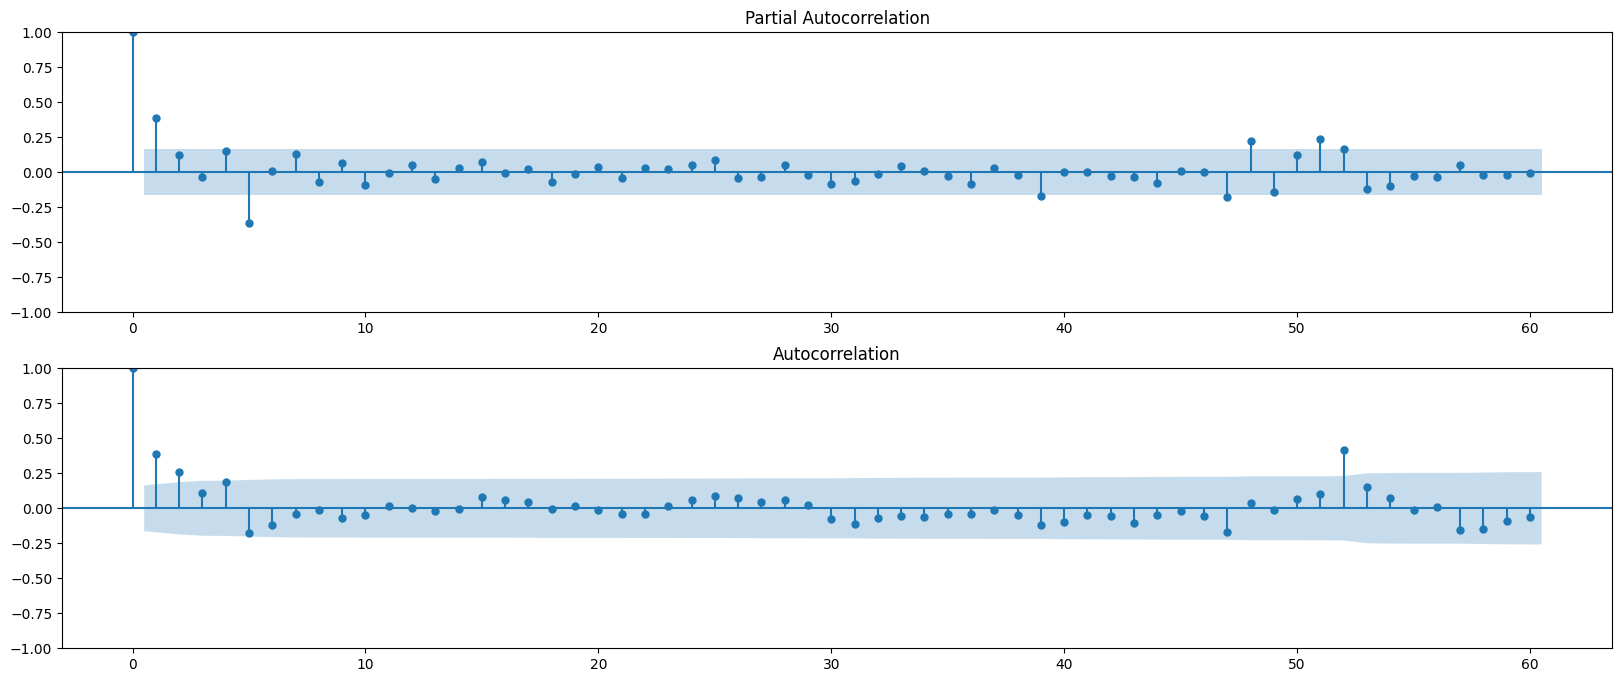

In [40]:
# ACF, PACF 그래프 시각화

fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(ts_decomp, lags=60, ax=ax1)

ax2 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_pacf(ts_decomp, lags=60, ax=ax2)

시차별 영향력을 확인하기 위해 ACF와 PACF 분석을 시행.

1주 전의 영향력이 약간 있는 것으로 보이며, 1년 주기인 52주 부근에서 높은 영향력이 나타나는 것을 알 수 있다.

**따라서, 회귀 모델을 만들 때에는 전 주의 매출액과 전 해 동일 시기의 매출액이 중요한 변수일 것으로 판단.**

In [41]:
# 회귀 모델용 데이터셋 가공
# 1~4, 52주 전 시점 패생변수 생성
df_agg['Weekly_Sales_1w'] = df_agg['Weekly_Sales'].shift(1)
df_agg['Weekly_Sales_2w'] = df_agg['Weekly_Sales'].shift(2)
df_agg['Weekly_Sales_3w'] = df_agg['Weekly_Sales'].shift(3)
df_agg['Weekly_Sales_4w'] = df_agg['Weekly_Sales'].shift(4)
df_agg['Weekly_Sales_52w'] = df_agg['Weekly_Sales'].shift(52)

# 모델용 데이터셋 기간 설정
df_agg_set = df_agg[df_agg['Date2'].isin(pd.date_range('2011-02-05', '2012-10-26'))]

# 독립변수, 종속변수 분리
df_x = df_agg_set.drop(['Year', 'Date2', 'Weekly_Sales'], axis=1)
df_y = df_agg_set[['Weekly_Sales']]

# 학습셋과 테스트셋 분리하여 생성(6:4)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.4, random_state=1)

print(len(x_train))
print(len(x_test))

54
36


In [42]:
# 다중회귀모델 생성
mreg = LinearRegression(fit_intercept=True)
mreg.fit(x_train, y_train)

# 테스트셋에 모델 적용
y_predict = mreg.predict(x_test)

# 모델 성능 확인
# 학습셋 R^2
print(round(mreg.score(x_train, y_train), 5))
# 테스트셋 R^2
print(round(mreg.score(x_test, y_test), 5))

0.79819
0.85102


**과소적합**

모델 성능을 높이기 위해서는 보다 효과적인 파생변수들을 찾아내고 변수의 영향력을 분석하는 등의 과정이 필요하다.

In [43]:
# 모델 상세 확인
ols_m = sm.OLS(y_train, sm.add_constant(x_train)).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     17.01
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           6.66e-12
Time:                        14:54:04   Log-Likelihood:                -795.72
No. Observations:                  54   AIC:                             1613.
Df Residuals:                      43   BIC:                             1635.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.332e+08   4.65e+07     -2.862      0.006   -2.27e+08   -3.94e+07
Temperature      -7264.0822   7834.873     -0.927      0.359   -2.31e+04    8536.445
Fuel_Price       -1.074e+06   5.62e+05     -1.909      0.063   -2.21e+06    6.06e+04
IsHoliday         2.908e+05   4.19e+05      0.694      0.492   -5.55e+05    1.14e+06
CPI               7.268e+05   2.21e+05      3.289      0.002    2.81e+05    1.17e+06
Unemployment      1.722e+06   1.18e+06      1.456      0.153   -6.63e+05    4.11e+06
Weekly_Sales_1w      0.1279      0.061      2.096      0.042       0.005       0.251
Weekly_Sales_2w      0.0249      0.045      0.552      0.584      -0.066       0.116
Weekly_Sales_3w      0.0094      0.046      0.205      0.838      -0.083       0.102
Weekly_Sales_4w     -0.0569      0.080     -0.708      0.483      -0.219       0.105
Weekly_Sales_52w     0.6633      0.068      9.766      0.000       0.526       0.800
==============================================================================
Omnibus:                       10.958   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.104
Skew:                          -0.759   Prob(JB):                      0.00143
Kurtosis:                       4.875   Cond. No.                     2.56e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# ADF 검정

# p-value가 0.05 미만이므로 대립가설 채택 → 정상성 만족
def ADF(ts_decomp):
  result = adfuller(ts_decomp.values, autolag='AIC')
  print("------ Augmented Dickey-Fuller Test ------")
  print('ADF Statistic: %f' % result[0])
  print('p-value: %1.10f' % result[1])
  print('Lag: %d' % result[2])
  print('observation: %d' % result[3])
  print('Critical Values: ')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF(ts_decomp)

------ Augmented Dickey-Fuller Test ------
ADF Statistic: -5.621733
p-value: 0.0000011410
Lag: 4
observation: 138
Critical Values: 
	1%: -3.479
	5%: -2.883
	10%: -2.578


In [46]:
# ARIMA용 학습셋, 테스트셋 생성
train = ts_decomp.loc['2010-02-05':'2012-09-21']
test = ts_decomp.loc['2012-09-28':'2012-10-26']

print(len(train))
print(len(test))

138
5


In [47]:
# ARIMA 예측값 출력

# p, d, q 파라미터값 설정
p, d, q = 3, 0, 3

model_arima = ARIMA(train['Weekly_Sales'], order=(p, d, q))
model_arima_fit = model_arima.fit()

# 예측값 출력
pred1 = model_arima_fit.forecast(steps=58)[0]
pred1 = pd.Series(pred1, index=test.index)

print(np.round_(pred1, 2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


Date2
2012-09-28    22385371.48
2012-10-05    22385371.48
2012-10-12    22385371.48
2012-10-19    22385371.48
2012-10-26    22385371.48
dtype: float64


<ipython-input-47-9f03de9c3cdc>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred1 = model_arima_fit.forecast(steps=58)[0]


<Axes: xlabel='Date2', ylabel='Weekly_Sales'>

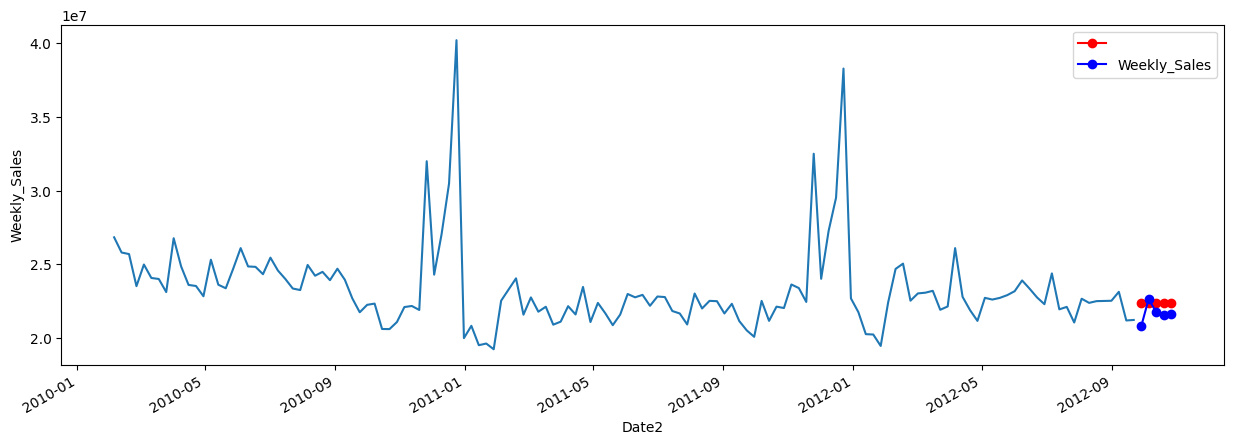

In [48]:
# ARIMA 모델 예측값 시각화
fig, ax = plt.subplots(figsize=(15, 5))
graph = sns.lineplot(x='Date2', y='Weekly_Sales', data=train)
pred1.plot(ax=ax, color='red', marker='o', legend=True)
test.plot(ax=ax, color='blue', marker='o', legend=True)

<Axes: xlabel='Date2', ylabel='Weekly_Sales'>

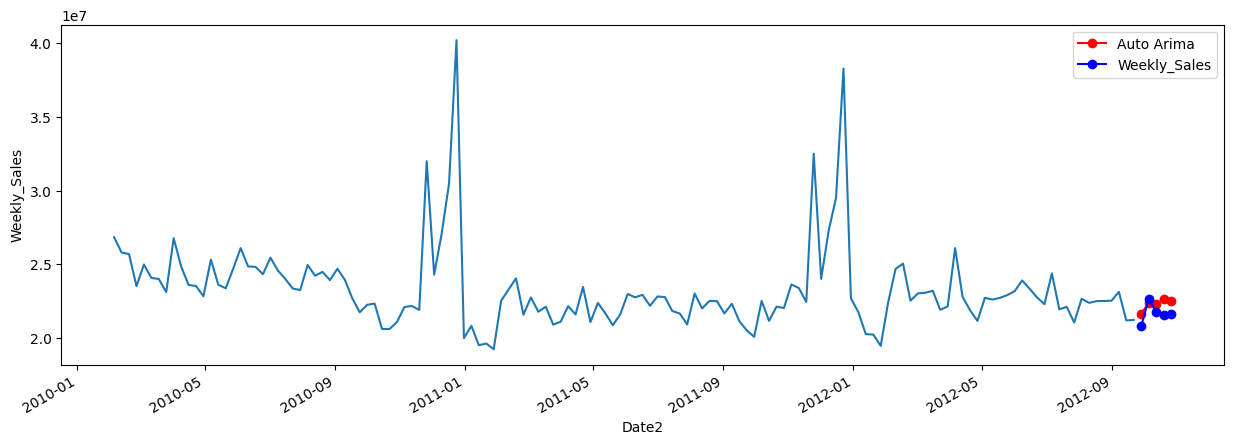

In [50]:
# Auto-ARIMA 모델 예측값 시각화
auto_arima_model = pm.auto_arima(train, seasonal=True, m=52)

# 모델 예측
pred2 = auto_arima_model.predict(5)
pred2 = pd.Series(pred2, index=test.index)
pred2 = pred2.rename('Auto Arima')

# 예측값 시각화
fig, ax = plt.subplots(figsize=(15, 5))
graph = sns.lineplot(x='Date2', y='Weekly_Sales', data=train)
pred2.plot(ax=ax, color='red',marker='o', legend=True)
test.plot(ax=ax, color='blue', marker='o', legend=True)

In [ ]:
# Auto-ARIMA 모델 요약
print(auto_arima_model.summary())

In [ ]:
# 모델 적합성 시각화
auto_arima_model.plot_diagnostics(figsize=(15, 5))

# **연관규칙과 협업 필터링**(추천 모델)


추천의 유형 세 가지:
1. **Editorial and hand curated**: 전문가가 직접 아이템을 평가하여 추천하는 시스템
  - 미술관 큐레이터
2. **Simple aggregates**: 대중에게 인기 잇는 아이템, 신규 아이템 등 특정 조건의 아이템을 추천하는 시스템
  - 인기 TOP 10, 최근 업로드 영상
3. **Tailored to individual users**: 각 개인의 특성, 선택한 아이템에 맞춰 추천하는 시스템
  - 아마존, 넷플릭스의 개인화 추천

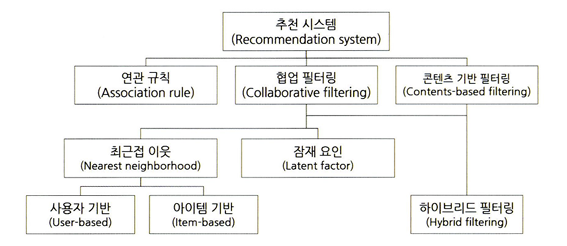

**협업 필터링 Collaborative Filtering**
데이터를 벡터로 표현하여, 데이터 간 유사도를 구해 추천 항목을 선별하는 방식으로 작동된다. CF는 사용하는 알고리즘에 따라 다양하게 구분된다.

#### 연관 규칙
A라는 제품을 구매한 사람은 B라는 제품도 구매할 확률이 높다는 결과를 이끌어내는 모델이다.

연관 규칙 분석의 대표적 알고리즘
- **Apriori**: 아이템들의 조합에 대한 경우의 수를 최소화하여 처리 속도 효율을 높인 알고리즘
- **FP-Growth**: 트리 기반 알고리즘으로, 항목 간 비교 계산을 최소화하여 처리 속도 효율을 높인 알고리즘
- **DHP**: 항목 집합의 개수가 2개인 트랜잭션을 먼저 해시 테이블로 만들어 처리 속도 효율을 높인 알고리즘

연관 규칙 분석에 사용되는 3가지 핵심 지표
1. **지지도 Support**: 아이템A와 B를 동시에 포함하는 거래가 발생할 확률
   - 전체 구매 횟수 중에서 해당 아이템 혹은 조합의 구매가 얼마나 발생하는지.
2. **신뢰도 Confidence**: 아이템A가 포함되는 거래에 B가 포함될 확률
   - 아이템(조합) A가 판매됐을 때 B 아이템(조합)도 함께 포함되는 조건부 확률.
3. **향상도 Lift**: 아이템A와 B가 독립적으로 판매되는 것 대비 함께 판매되는 비율
   - 아이템(조합) A의 판매 중 아이템(조합) B가 포함된 비율이, 전체 거래 중 아이템(조합) B가 판매된 비율보다 얼마나 증가했는지를 나타내는 지표.
   - 두 아이템(조합) 간의 연관성을 나타내는 지표이기 때문에 조건절과 결과절의 위치가 바뀌어도 값이 동일하다 → 대칭적 척도 Symmetric measure

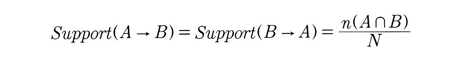

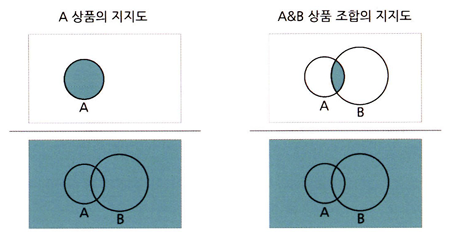

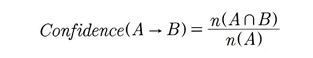

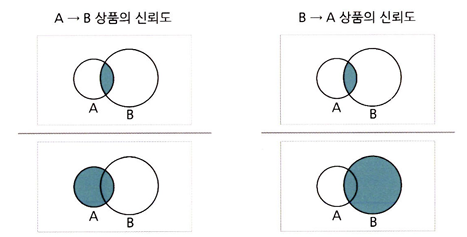

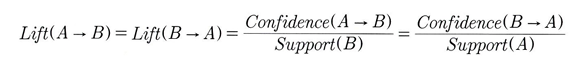

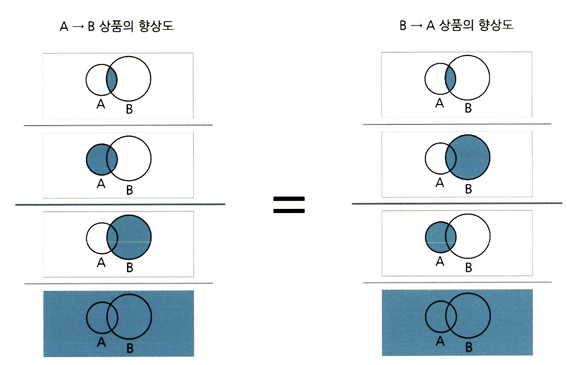

연관규칙 분석은 고려해야 할 지표가 3가지나 되기 때문에 분석가나 비즈니스 담당자의 주관적 판단이 들어갈 수 밖에 없다. 이를 보완하기 위한 평가 척도들은 다음과 같다.

-  **IS, Interest-Support 측도**: 향상도와 지지도를 곱한 후 취한 값
-  **교차지지도 Cross Support**: 전체 아이템 중 최대 지지도 대비 최소 지지도의 비율

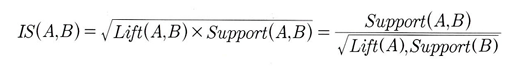

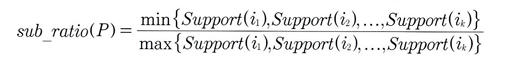

콘텐츠 기반 필터링과 협업 필터링

특잇값 분해 SVD

ALS, SGD

Cold Start

In [52]:
# 연관규칙 실습

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv('market_basket.csv')
df.head()

,cust_cd,std_dt,prdct_cd,prdct_nm
0,C617077280704,2021-06-19,A10001,tropical fruit
1,C617077280704,2021-06-19,A10002,whole milk
2,C617077280704,2021-06-19,A10003,pip fruit
3,C617077280704,2021-06-19,A10004,other vegetables
4,C617077280704,2021-06-19,A10005,cream


In [54]:
# apriori 모델 적용을 위한 품목 리스트 가공
itemset = df.drop_duplicates(
    ['cust_cd', 'std_dt', 'prdct_nm']).groupby(
        ['cust_cd', 'std_dt'])['prdct_nm'].apply(list)

itemset = pd.DataFrame(itemset).reset_index().drop(
    ['cust_cd', 'std_dt'], axis='columns')

itemset = itemset.squeeze()
itemset.head()

,prdct_nm
0,"[beef, herbs, tropical fruit, whole milk, chic..."
1,"[sugar, packaged fruit/vegetables, sausage, sp..."
2,"[berries, tropical fruit, fruit/vegetable juic..."
3,"[yogurt, beef, cream, herbs, chicken, bottled ..."
4,"[berries, beef, yogurt, specialty bar, bottled..."


기존 데이터셋을 apriori 모델에 적용하기 위해서 각 장바구니의 구매 품목들을 리스트 형태로 저장한다.

ex. 첫 번째 행의 경우 beef, herbs, tropical fruit 등의 품목이 함께 구매된 것을 알 수 있다.

In [55]:
# apriori 모델 적용을 위한 장바구니 - 품목 더미 가공

encoder = TransactionEncoder()
encoder_T = encoder.fit(itemset).transform(itemset)

# 데이터프레임으로 변경
itemset_matrix = pd.DataFrame(encoder_T, columns=encoder.columns_)

itemset_matrix.head()

,beef,berries,beverages,bottled beer,bottled water,brown bread,butter,butter milk,canned beer,chicken,...,sparkling wine,specialty bar,specialty chocolate,sugar,syrup,tropical fruit,turkey,white wine,whole milk,yogurt
0,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,True,True,False,False,True,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True


In [57]:
# 지지도 0.1 기준으로 apriori 적용
itemset_apriori = apriori(itemset_matrix, min_support=0.01, use_colnames=True)
itemset_apriori.head()

,support,itemsets
0,0.166612,(beef)
1,0.105074,(berries)
2,0.017010,(beverages)
3,0.025754,(bottled beer)
4,0.095191,(bottled water)


In [58]:
# 향상도 5 이상 상품 조합 추출
association_rules(itemset_apriori, metric='lift', min_threshold=5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(ham, beef)",(bottled water),0.028179,0.095191,0.014585,0.517601,5.437508,0.011903,1.875645,0.839756
1,(bottled water),"(ham, beef)",0.095191,0.028179,0.014585,0.153223,5.437508,0.011903,1.147670,0.901950
2,"(beef, yogurt)",(bottled water),0.023844,0.095191,0.011977,0.502311,5.276885,0.009707,1.818022,0.830291
3,(bottled water),"(beef, yogurt)",0.095191,0.023844,0.011977,0.125820,5.276885,0.009707,1.116654,0.895763
4,"(beef, pastry, cream)",(bottled water),0.030163,0.095191,0.014879,0.493301,5.182229,0.012008,1.785693,0.832132
5,"(beef, pastry)","(bottled water, cream)",0.046916,0.047797,0.014879,0.317150,6.635276,0.012637,1.394453,0.891097
6,"(beef, cream)","(pastry, bottled water)",0.069878,0.037474,0.014879,0.212934,5.682200,0.012261,1.222929,0.885918
7,"(pastry, bottled water)","(beef, cream)",0.037474,0.069878,0.014879,0.397059,5.682200,0.012261,1.542642,0.856093
8,"(bottled water, cream)","(beef, pastry)",0.047797,0.046916,0.014879,0.311299,6.635276,0.012637,1.383887,0.891922
9,(bottled water),"(beef, pastry, cream)",0.095191,0.030163,0.014879,0.156310,5.182229,0.012008,1.149519,0.891937


`association_rules()` 함수를 사용하여 품목(조합) 간의 향상도, 지지도, 신뢰도 등을 확인한다.

위의 코드에서는 향상도가 5 이상인 품목 조합을 추출하였다. 향상도가 5이면 해당 품목을 자연적으로 구매할 확률보다 연관 품목을 구매했을 때 해당 품목을 구매할 확률이 5배 높은 것이므로 연관도가 매우 높다고 할 수 있다.

In [59]:
# 협업 필터링 실습
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

In [61]:
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')

df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [62]:
df_ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [64]:
# 고객, 영화 유사도 측정을 우한 전치 데이터셋 생성

# ratings 데이터와 movies 데이터 결합
df_merge = pd.merge(df_ratings, df_movies, on='movieId')

# 고객-아이템 평점 행렬 생성
df_merge_pivot = df_merge.pivot_table('rating', 'userId', 'title')

# 결측 0으로 변환
df_merge_pivot_null = df_merge_pivot.fillna(0)

# 아이템-사용자 평점 행렬로 전치
df_merge_pivot_T = df_merge_pivot_null.T
df_merge_pivot_T.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


고객 간의 유사도와 영화 간의 유사도를 산출하기 위해 고객과 영화 평점이 행렬로 이루어진 테이블을 생성한다.

output 결과에서 인덱스는 모든 영화 제목으로 이루어져 있고 668명의 고객들이 각 칼럼으로 이루어진 것을 확인 가능.
- **유사도 측정** 시에는 평점이 기록되지 않은 **결측값을 0으로 대치한** 테이블을 사용
- **협업 필터링** 시에는 **결측값이 그대로 포함된** 테이블을 사용한다.

In [65]:
# 영화 유사도 행렬 생성
item_sim = cosine_similarity(df_merge_pivot_T)

# 데이터 프레임 형태 변환
item_sim_df = pd.DataFrame(item_sim, index=df_merge_pivot_T.index, columns=df_merge_pivot_T.index)

item_sim_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.342682,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.158272,0.0,0.098324,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.147486,0.0
'Round Midnight (1986),0.0,0.0,1.0,0.0,0.0,0.0,0.081094,0.000000,0.257012,0.680414,...,0.000000,0.227429,0.141421,0.0,0.100219,0.0,0.221581,0.0,0.098324,1.0
'Til There Was You (1997),0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
"'burbs, The (1989)",0.0,0.0,0.0,0.0,1.0,0.0,0.031610,0.231897,0.100923,0.000000,...,0.057358,0.000000,0.000000,0.0,0.212684,0.0,0.104192,0.0,0.161820,0.0


행렬 테이블에 `cosine_similarity()` 함수를 적용하여 영화 간의 유사도 행렬을 생성한다.


영화는 영화 자신과는 1의 유사도를 갖고, 다른 영화와의 유사도를 표에서 확인할 수 있다.

In [66]:
# 500 Days of Summer와 유사도가 높은 상위 5개 영화 추출
item_sim_df['(500) Days of Summer (2009)'].sort_values(ascending=False)[1:6]

,(500) Days of Summer (2009)
title,
Scott Pilgrim vs. the World (2010),0.502121
Up in the Air (2009),0.498354
"Social Network, The (2010)",0.497004
Forgetting Sarah Marshall (2008),0.472271
Shutter Island (2010),0.468202


`item_sim_df` 테이블에서 확인하고자 하는 영화명을 칼럼명으로 지정하여 유사도 값 내림차순으로 정렬(`ascending=False`)하면 상위 유사도 영화 리스트를 추출할 수 있다.

In [68]:
# 고객 유사도 행렬 생성
user_sim = cosine_similarity(df_merge_pivot_null)

# 데이터 프레임 형태 변환
user_sim_df = pd.DataFrame(user_sim, index=df_merge_pivot_null.index, columns=df_merge_pivot_null.index)

user_sim_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.101113,0.210044,0.128766,0.057896,0.077130,0.358090,0.097434,0.239189,0.026663,...,0.291162,0.144741,0.106583,0.091049,0.236805,0.154519,0.245071,0.238660,0.278217,0.153493
2,0.101113,1.000000,0.115559,0.034610,0.032705,0.028305,0.062914,0.471918,0.194232,0.000000,...,0.068325,0.000000,0.477330,0.146887,0.163553,0.061737,0.050948,0.051423,0.035907,0.064822
3,0.210044,0.115559,1.000000,0.058208,0.044426,0.012816,0.084522,0.066620,0.459703,0.068454,...,0.152078,0.301021,0.081626,0.098949,0.310234,0.079452,0.092821,0.080940,0.158943,0.109658
4,0.128766,0.034610,0.058208,1.000000,0.019298,0.005781,0.059089,0.024420,0.050572,0.000000,...,0.055860,0.024329,0.040467,0.108881,0.076241,0.014011,0.042643,0.174275,0.061677,0.157809
5,0.057896,0.032705,0.044426,0.019298,1.000000,0.053378,0.080822,0.041536,0.023168,0.011915,...,0.058450,0.007315,0.024708,0.038163,0.053085,0.048993,0.055431,0.026053,0.086667,0.068281


`df_merge_pivot_null` 테이블에 `cosine_similarity()` 함수를 적용하여 **고객 간 유사도 행렬 테이블을 생성**한다.

In [69]:
# 7번 고객과 유사도가 높은 상위 5명 추출

user_sim_df[7].sort_values(ascending=False)[1:6]

,7
userId,
403,0.432287
358,0.414600
228,0.396949
328,0.391268
590,0.387817


In [70]:
# 협업 필터링용 샘플 행렬 생성

# 잠재요인 차원 30으로 설정
K = 30

# 샘플용 영화 30개만 필터링
df_merge_sample = df_merge_pivot.iloc[:, 0:30]
df_array = df_merge_sample.values
user_cnt, item_cnt = df_array.shape

# 고객 수, 영화수 x 자원수 행렬 생성
np.random.seed(47)
user_matrix = np.random.normal(scale=1./K, size=(user_cnt, K))
item_matrix = np.random.normal(scale=1./K, size=(item_cnt, K))

# 고객 행렬 확인
print(user_matrix.shape)
# 영화 행렬 확인
print(item_matrix.shape)

(668, 30)
(30, 30)


In [83]:
# RMSE 함수 정의 확인

def get_rmse(df_array, user_matrix, item_matrix, not_nan_index):
  error = 0
  # 예측용 df_array 생성
  pred_rating_matrix = user_matrix @ item_matrix.T

  # 결측 없는 실제 행렬과 예측 행렬 생성
  df_array_not_null = df_array[not_nan_index]
  pred_rating_matrix_not_null = pred_rating_matrix[not_nan_index]

  # RMSE 산출
  mse = mean_squared_error(df_array_not_null, pred_rating_matrix_not_null)
  rmse = np.sqrt(mse)

  return rmse

In [84]:
# 행렬 분해 함수 정의

def matrix_factorization(df_array, K, steps=1000, learning_rate=0.01, r_lambda=0.01):
  # 결측값이 아닌 df_array의 index 생성
  not_nan_index = np.where(np.isnan(df_array)==False)

  # SGD 행렬 분해 알고리즘 적용
  for step in range(steps):
    for p, q, r in zip(not_nan_index[0], not_nan_index[1], df_array[not_nan_index]):
      # 실젯값과 예측값 차이 계산
      r_pq = user_matrix[p, :] @ item_matrix[q, :].T
      error_pq = r - r_pq

      # SGD
      user_matrix[p, :] = user_matrix[p, :] + learning_rate*(error_pq * item_matrix[q, :] - r_lambda*user_matrix[p, :])
      item_matrix[q, :] = item_matrix[q, :] + learning_rate*(error_pq * user_matrix[p, :] - r_lambda*item_matrix[q, :])

    rmse = get_rmse(df_array, user_matrix, item_matrix, not_nan_index)

    if ((step + 1) % 100) == 0:
      print('반복 횟수: ', step+1, ' RMSE: ', np.round(rmse, 3))

  return user_matrix, item_matrix

모델 생성 반복마다 실제 평점과 예측 평점의 RMSE를 계산하고 100회 간격으로 RMSE 수치를 출력하도록 설정한다.

In [85]:
# 행렬 분해, 내적
user_matrix, item_matrix = matrix_factorization(df_array, K, steps=1000, learning_rate=0.01, r_lambda=0.01)

pred_matrix = user_matrix @ item_matrix.T

반복 횟수:  100  RMSE:  0.087
반복 횟수:  200  RMSE:  0.027
반복 횟수:  300  RMSE:  0.024
반복 횟수:  400  RMSE:  0.023
반복 횟수:  500  RMSE:  0.021
반복 횟수:  600  RMSE:  0.02
반복 횟수:  700  RMSE:  0.02
반복 횟수:  800  RMSE:  0.019
반복 횟수:  900  RMSE:  0.019
반복 횟수:  1000  RMSE:  0.018


In [86]:
# 데이터 프레임 변환
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index=df_merge_sample.index, columns=df_merge_sample.columns)

ratings_pred_matrix.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,"10th Kingdom, The (2000)",11-11-11 (11-11-11: The Prophecy) (2011),11:14 (2003),"11th Hour, The (2007)",12 (2007),12 Angry Men (1957),12 Angry Men (1997),12 Rounds (2009),12 Years a Slave (2013),127 Hours (2010)
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.051608,-0.083897,-0.069654,-0.105801,-0.186537,-0.094296,-0.098529,-0.177008,-0.103163,-0.082779,...,-0.045861,-0.079767,-0.111977,-0.110715,-0.034174,-0.162973,-0.076060,-0.051919,-0.128431,-0.113020
2,0.068965,0.063732,0.029376,0.103882,0.070608,0.035855,0.094260,0.170627,0.130463,0.053876,...,0.134789,0.066041,0.067402,0.097388,0.013622,0.127847,-0.041964,0.049947,0.106180,0.082769
3,0.128383,0.089695,0.090365,0.066499,0.103086,0.031886,0.212380,0.048254,0.182750,0.070947,...,0.142649,0.191365,0.256740,0.230944,0.064846,0.149430,-0.003335,0.198303,0.207353,0.198306
4,2.896962,1.712778,1.788285,2.659050,2.821059,2.215066,2.084223,2.555793,3.307400,2.253552,...,1.649291,1.937878,2.731184,2.678969,1.101126,4.982016,0.620433,2.019092,3.726253,2.953497
5,0.001853,0.076659,-0.039206,-0.029280,-0.007621,-0.051861,-0.026456,0.004070,0.040523,-0.024381,...,0.042973,0.052831,0.024576,0.030633,-0.026074,-0.008225,0.040030,0.000829,0.007069,-0.021936


앞에서 최종 생성된 pred_matrix 행렬을 데이터 프레임 형태로 변환한 다음 데이터 확인. 인덱스에는 모든 고객번호가 입력되어 있으며 각 칼럼은 영화 제목으로 이루어져 있다.

output 결과에서 모든 값이 예측 점수로 채워져 있음을 확인 가능.

In [87]:
# 영화 추천을 위한 함수 설정

# 미상영 영화 리스트 추출 함수
def get_unseen_movies(df_merge_sample, userId):
  # 모든 영화 리스트 생성
  movies_list = df_merge_sample.columns.tolist()

  # 고객별 평점 테이블 생성
  ratings = df_merge_sample.loc[userId, :]

  # 평점을 매기지 않은 영화 리스트 생성
  none_rating_list = ratings[ratings.isnull()].index.tolist()

  # 평점 없는 영화로 미상영 영화 리스트 생성
  unseen_movie_list = [movie for movie in movies_list if movie in none_rating_list]

  return unseen_movie_list

# 미상영 영화 중 예측 점수가 높은 순으로 정렬
def recomm_movie_by_userid(pred_df, userId, unseen_movie_list, top_n=10):
  recomm_movies = pred_df.loc[userId, unseen_movie_list].sort_values(ascending=False)[:top_n]

  return recomm_movies

In [88]:
# 575번 고객의 추천 영화 리스트 생성

# 575번 고객의 미상영 영화 리스트 생성
unseen_movie_list = get_unseen_movies(df_merge_sample, 575)

# 미상영 영화 중 예측 평점이 높은 영화 리스트 생성
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 575, unseen_movie_list, top_n=10)

# 최종 데이터셋 생성
recomm_movies = pd.DataFrame(data=recomm_movies.values, index=recomm_movies.index, columns=['pred_score']).reset_index()

recomm_movies.head(10)

,title,pred_score
0,12 Years a Slave (2013),3.570466
1,127 Hours (2010),3.362860
2,101 Dalmatians (One Hundred and One Dalmatians...,2.968719
3,10 Items or Less (2006),2.949304
4,11:14 (2003),2.885661
5,"11th Hour, The (2007)",2.743861
6,*batteries not included (1987),2.701064
7,'71 (2014),2.672795
8,12 Rounds (2009),2.585709
9,10th & Wolf (2006),2.491233


# **인공 신경망 CNN, RNN, LSTM**

인공신경망, 즉 신경망은 복잡한 비선형적 관계를 병렬적으로 분석하고 처리하고 오류나 잡음에 강하기 때문에 일반화 성능이 뛰어나다.

신경망 모델의 독립변수들에 가중치를 부여하여 값을 합산한다.합산된 값이 신경망 모델을 통해 출력되는 결과값을 가진다.

기본적인 신경망 구조는 **입력층(Input Layer)**, **은닉층(Hidden Layer)**, 그리고 **출력층(Output Layer)** 이렇게 3가지 층으로 분류되어 있다.
- **입력층**은 독립변수의 값들을 입력하는 역할을 하기 때문에 독립변수의 수만큼 노드를 갖게 된다.
- **은닉층**에서는 입력층에서 들어온 값들을 합산하여 보관을 하고, 노드들을 연결하는 층 사이에는 가중치들이 있다.
 - 신경망 알고리즘 사이에 있어서 어떤 계산들이 이루어지는지 파악하기 힘들다는 특징이 있다.
 - 신경망은 출력값과 Y값과의 차이를 봐서 은닉층의 가중치를 조절한다는 차이가 있다.
 - 중간 은닉층이 있는 것은 회귀분석과의 가장 큰 차이점이다.

**오류역전파 Back-Propagation of Error**
처음 주어진 가중치를 이용해 출력층의 값을 계산하고, 결괏값과의 오차를 각 가중치로 미분한 값을 처음 가중치에서 빼주는 작업을 반복하여 가중치를 조절하는 과정.

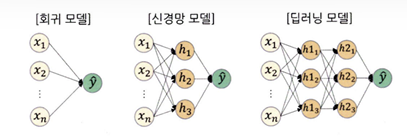

#### **CNN**, Convolution Neural Network 합성곱 신경망
사람의 시신경 구조를 모방한 구조로써, 데이터의 특징을 추출하여 패턴을 파악한다.
CNN은 Convolution과 Pooling의 단계를 통해 데이터를 효율적으로 연산한다.

**Convolution 합성곱**의 정의는 두 함수 f, g 가운데 하나의 함수를 반전(reverse), 전이(shift)시킨 다음, 다른 하나의 함수와 곱한 결과를 적분하는 것을 의미한다.

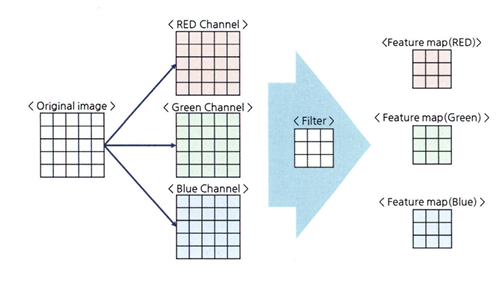

각 픽셀에 **필터(Filter)**를 대입하여 주변 픽셀들의 값을 합성한 **Feature Map**을 만든다. Feature Map은 원본 이미지에 필터를 대입하여 각 값을 합하여 만든다.

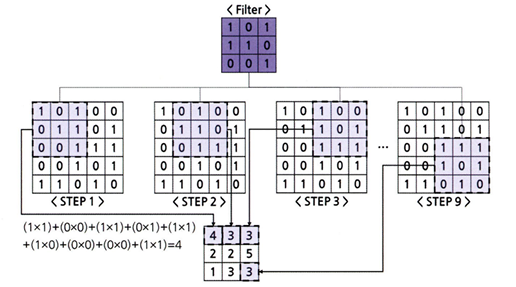

#### **RNN**, Reccurent Nerual Network 순환신경망
자연어처리 영역에서 많이 쓰이고 있는 구조로, 알고리즘 내부에 **순환구조**가 들어가 있다. **이전의 연산 결과 정보를 갖고서 다음 연산을 순차적으로 진행**한다.

**RNN은 출력 결과가 이전 계산 결과의 영향을 받는다**은 가정으로 출발했다는 점에서 기본적인 신경망 구조(입력층과 출력층이 한 방향으로만 흐르는 Feedforward 방식으로 모든 입력과 출력이 서로 독립적)와 차이가 있다.

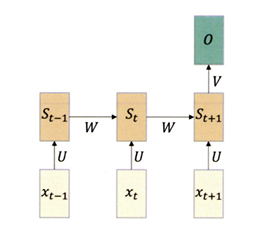

**RNN은 시차 요소가 적용되는 모델**로, 맨 아래의 박스는 각 시점별 입력값, 중간 부분의 박스는 RNN의 기억을 담당하는 은닉층(Hidden state)을 의미한다. 맨 위의 사각형 O는 최종 출력값.

**각 은닉층 단위 S는 X를 입력받고 기억정보를 다음 시차의 S로 전달한다. 기억정보를 전달받은 다음 S는 새로 입력받는 X값을 종합하여 다음 S로 전달한다.**

분석 용도에 따라 모델의 구조는 변화한다.

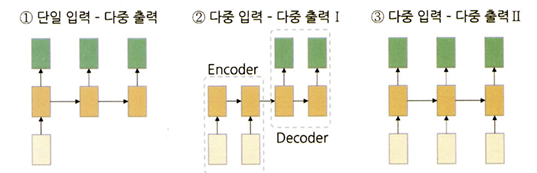

#### **LTSM**, Long Short Term Mermory networks
기존 RNN과 유사한 구조를 가지고 있지만 셀 스테이트(cell state)라는 요소를 가지고 있다. Cell state는 가중치를 계속 기억할 것인지를 결정해주는 역할을 한다.
가중치가 기억되면, 거리가 먼 과거의 인풋이라고 해도 가중치가 그대로 적용된다.

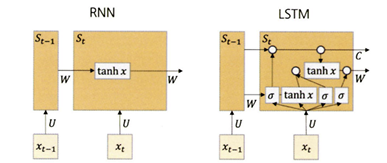

In [94]:
# 인공 신경망 실습
!pip install tensorflow
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, LSTM, Conv2D, MaxPooling2D
import sys
from sklearn.preprocessing import MinMaxScaler
import random

In [97]:
# CNN 모델 생성

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 데이터를 10000개로 제한
(x_train, y_train), (x_test, y_test) = (x_train[:10000], y_train[:10000]), (x_test[:10000], y_test[:10000])

input_shape = (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 데이터 정규화
x_train = x_train.astype('float') / 256.
x_test = x_test.astype('float') / 256.

# 학습셋, 테스트셋 범주 10 설정
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# CNN 모델 구축 - 은닉층 생성
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# CNN 컴파일
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,620,362 (6.18 MB)

 Trainable params: 1,620,362 (6.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
264/264 ━━━━━━━━━━━━━━━━━━━━ 43s 153ms/step - accuracy: 0.6134 - loss: 0.1968 - val_accuracy: 0.9496 - val_loss: 0.0338
Epoch 2/5
264/264 ━━━━━━━━━━━━━━━━━━━━ 37s 139ms/step - accuracy: 0.9515 - loss: 0.0351 - val_accuracy: 0.9585 - val_loss: 0.0257
Epoch 3/5
264/264 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - accuracy: 0.9674 - loss: 0.0233 - val_accuracy: 0.9788 - val_loss: 0.0134
Epoch 4/5
264/264 ━━━━━━━━━━━━━━━━━━━━ 44s 156ms/step - accuracy: 0.9783 - loss: 0.0170 - val_accuracy: 0.9811 - val_loss: 0.0115
Epoch 5/5
264/264 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.9788 - loss: 0.0153 - val_accuracy: 0.9819 - val_loss: 0.0114
Test Accuracy:  0.9818999767303467
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


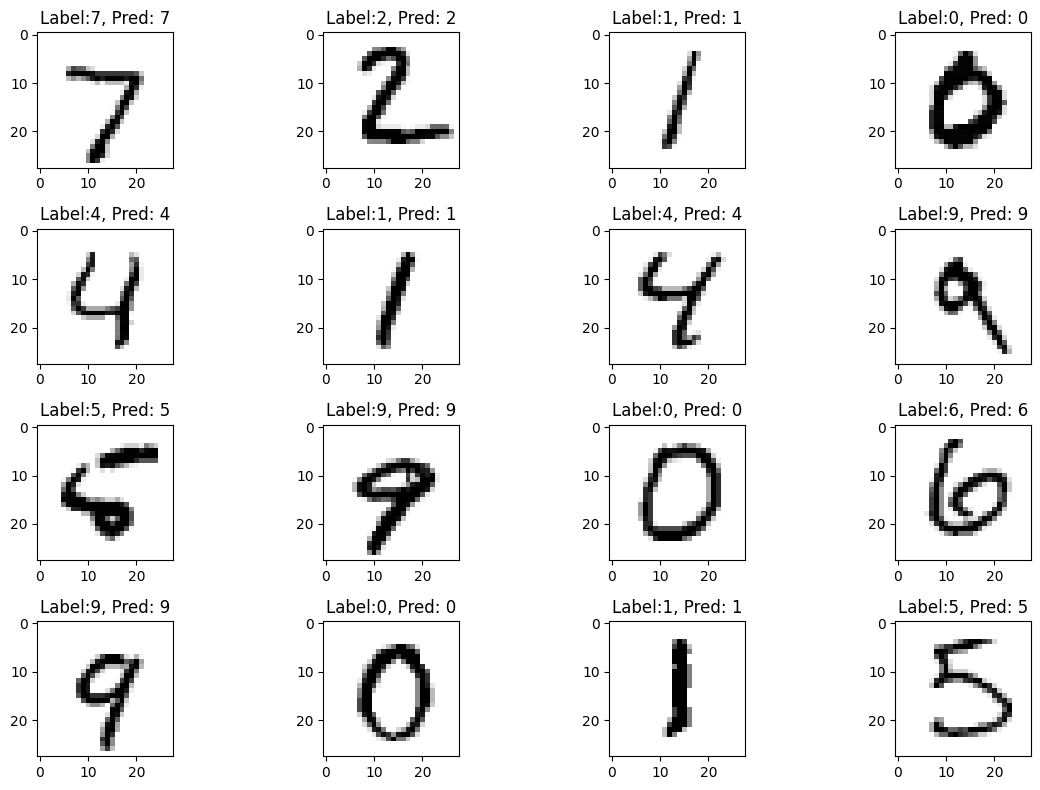

In [98]:
# CNN 모델 결과 출력

# 모델 적합(반복 횟수 5)
model_fit = model.fit(x_train, y_train, batch_size=38, epochs=5, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

# 모델 정확도 출력
print('Test Accuracy: ', score[1])

# 샘플 결과 확인
pred_test = model.predict(x_test)
pred_test_y = np.argmax(pred_test, axis=1)
test_y = np.argmax(y_test, axis=1)

count = 0

plt.figure(figsize=(12, 8))
for n in range(16):
  count += 1
  plt.subplot(4, 4, count)
  plt.imshow(x_test[n].reshape(28, 28), cmap='binary', interpolation='nearest')
  sample_result = 'Label:' + str(test_y[n]) + ', Pred: ' + str(pred_test_y[n])
  plt.title(sample_result)
plt.tight_layout()

plt.show()

In [100]:
# RNN과 LTSM 실습
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

print(len(df_train))
print(len(df_test))

df_train.head()

1258
20


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [101]:
# 데이터 정규화 및 numpy 배열 변환
df_train_array = df_train.iloc[:, 1:2].values
scaler = MinMaxScaler(feature_range=(0,1))
df_train_array_scaled = scaler.fit_transform(df_train_array)

x_train = []
y_train = []

for i in range(60, 1258):
  # 독립변수와 종속변수 생성 - 60일 시간차
  x_train.append(df_train_array_scaled[i-60: i, 0])
  y_train.append(df_train_array_scaled[i, 0])

# numpy 배열로 변환
x_train, y_train = np.array(x_train), np.array(y_train)

# 새로운 차원 추가
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1198, 60, 1)


RNN과 LTSM 실습은 구글 주가를 예측하는 시계열 모델을 만들 것이기 때문에 60일 기간 격차로 학습셋의 독립변수와 종속변수를 생성한다.

In [ ]:
# RNN 모델에 LSTM 레이어 추가하여 모델 생성 및 학습

# 모델 설정
RL_model = Sequential()
epochs = 100
batch_size = 28

# 첫 번째 LSTM Layer 및 일부 Dropout 정규화 추가
RL_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Ignore 20% of the neurons
RL_model.add(Dropout(0.2))

# 두 번째 LSTM Layer 및 일부 Dropout 정규화 추가
RL_model.add(LSTM(units=50, return_sequences=True))
RL_model.add(Dropout(0.2))

# 세 번째 LSTM Layer 및 일부 Dropout 정규화 추가
RL_model.add(LSTM(units=50, return_sequences=True))
RL_model.add(Dropout(0.2))

# 네 번째 LSTM Layer 및 일부 Dropout 정규화 추가
RL_model.add(LSTM(units=50))
RL_model.add(Dropout(0.2))

# 출력 레이어 추가
RL_model.add(Dense(units=1))

# RNN 컴파일
RL_model.compile(optimizer='adam', loss='mean_squared_error')

# 학습셋에 RNN(LSTM) 모델 적용
RL_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 29s 188ms/step - loss: 0.0771
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 217ms/step - loss: 0.0070
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - loss: 0.0059
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - loss: 0.0058
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - loss: 0.0048
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step - loss: 0.0053
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - loss: 0.0049
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - loss: 0.0042
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 269ms/step - loss: 0.0035
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step - loss: 0.0043
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - loss: 0.0054
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - loss: 0.0047
Epoch 13/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - loss: 0.0035
Epoch 14/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - loss: 0.0038
Epoch 15/100
43/43 ━━━━━━━━━━━━

In [ ]:
# 예측 및 결과 시각화

df_test_array = df_test.iloc[:, 1:2].values

# 학습셋과 테스트셋 결합
dataset_total = pd.concat((df_train['Open'], df_test['Open']), axis=0)

# 마지막 60일 기간 분리
y_test = dataset_total[len(dataset_total)-len(df_test)-60 : ].values

# 데이터를 하나의 열로 가공
y_test = y_test.reshape(-1,1)

# 테스트셋 정규화 적용
y_test = scaler.transform(y_test)

# 60일 데이터 구조 생성
x_test = []
for i in range(60, 80):
  x_test.append(y_test[i-60:i, 0])
x_test = np.array(x_test)

# 새로운 차원 추가
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 예측값 산출
predicted_stock_price = RL_model.predict(x_test)

# 정규화된 값을 기존 값으로 재변환
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# 결괏값 시각화
plt.plot(df_test_array, color='m', label='real price')
plt.plot(predicted_stock_price, color='c', label='predicted price')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()

마지막 테스트셋을 학습셋과 결합한 다음 앞의 학습셋과 동일한 방법으로 전처리한 후 모델을 적용하여 예측값을 산출한다. 예측값은 정규화가 적용된 수치이므로 다시 기존의 스케일로 변환을 한 다음 실제 주식 가겨과 비교한다.

**모델의 은닉층, 반복 횟수, 배치 사이즈 등의 옵션 값을 튜닝해가며 모델 성능을 튜닝할 수 있다.**